In [39]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

In [40]:
%load_ext autoreload
%autoreload 1
%aimport aa

In [78]:
files = os.listdir()
stretch = pd.read_csv('data/j07.csv',header=2,index_col='time').transpose()
stretch=stretch.drop([107,99,108,109,110],axis=1)
stretch.index=stretch.index.map(float)
stretch.index=stretch.index.rename('Time')
stretch

['.DS_Store', '__pycache__', 'figures', 'aa.py', '.ipynb_checkpoints', 'Joystick_Data-Noble.ipynb', 'data']


time,2,3,4,5,6,7,8,9,10,11,...,71,72,73,74,75,76,77,78,79,80
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.504,0.501,0.506,0.495,0.512,0.500,0.503,0.495,0.498,0.495,...,0.499,0.508,0.504,0.505,0.508,0.497,0.499,0.499,0.506,0.497
0.3,0.505,0.545,0.503,0.496,0.504,0.501,0.504,0.496,0.493,0.496,...,0.498,0.508,0.500,0.504,0.506,0.504,0.497,0.501,0.495,0.497
0.7,0.504,0.530,0.478,0.498,0.501,0.500,0.505,0.495,0.505,0.495,...,0.499,0.507,0.501,0.503,0.504,0.506,0.499,0.502,0.502,0.496
1.0,0.504,0.529,0.478,0.498,0.501,0.490,0.505,0.493,0.507,0.495,...,0.499,0.506,0.505,0.503,0.504,0.508,0.490,0.501,0.503,0.493
1.3,0.504,0.510,0.476,0.499,0.499,0.491,0.518,0.494,0.508,0.495,...,0.498,0.505,0.505,0.503,0.504,0.509,0.485,0.501,0.508,0.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71.7,0.505,0.496,0.225,0.504,0.504,0.502,0.520,0.080,0.500,0.502,...,0.502,0.508,0.396,0.506,0.112,0.324,0.017,0.000,0.507,0.489
72.0,0.505,0.500,0.267,0.504,0.504,0.503,0.506,0.080,0.500,0.503,...,0.503,0.508,0.395,0.505,0.156,0.328,0.401,0.570,0.506,0.492
72.3,0.505,0.501,0.290,0.504,0.504,0.503,0.506,0.088,0.500,0.503,...,0.505,0.508,0.450,0.506,0.200,0.349,0.502,0.501,0.507,0.493


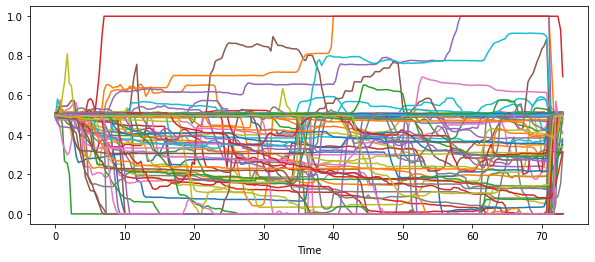

In [66]:
stretch.plot(legend=False,figsize=(10,4))
plt.show()

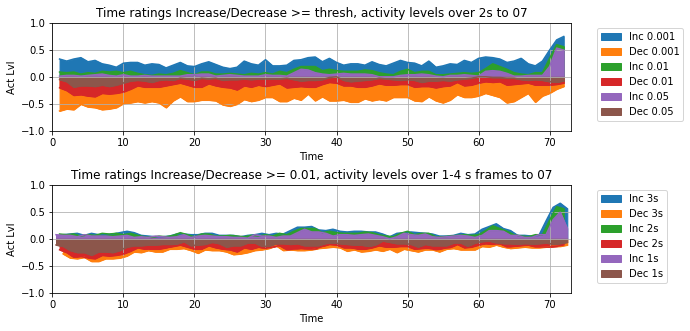

In [77]:
fig = plt.figure(figsize=(9,5))
left, width = 0.1, 0.8
bottom, height = 0.1, 0.3
spacing = 0.15

HopSize = 1 # seconds
thr = [0.001,0.01,0.05]
frm = [3,2,1]
stim = '07'
subp = 0
ax= fig.add_axes([left,bottom+subp*(height+ spacing),width,height])
for f in frm:
    FrameSize = f # seconds
    Thresh = thr[1]#Treshes[feat] # minimum
    AC1 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Inc') 
    AC2 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Dec')
    AC = pd.DataFrame()
    AC['Inc'+' '+str(f) + 's']=AC1['Total']
    AC['Dec'+' '+str(f) + 's']=-AC2['Total']
    AC.plot.area(ax=ax)

plt.grid()
plt.ylim(-1,1)
plt.xlim(stretch.index[0],stretch.index[-1])
#plt.xlim(-15,15)
plt.title('Time ratings Increase/Decrease >= ' + str(Thresh)+ ', activity levels over 1-4 s frames to ' + stim)
plt.ylabel('Act Lvl')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

subp +=1
ax= fig.add_axes([left,bottom+subp*(height+ spacing),width,height])
for t in thr:
    FrameSize = 2 # seconds
    Thresh = t#Treshes[feat] # minimum
    AC1 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Inc') 
    AC2 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Dec')
    AC = pd.DataFrame()
    AC['Inc'+' '+str(t)]=AC1['Total']
    AC['Dec'+' '+str(t)]=-AC2['Total']
    AC.plot.area(ax=ax)

plt.grid()
plt.ylim(-1,1)
plt.xlim(stretch.index[0],stretch.index[-1])
#plt.xlim(-15,15)
plt.title('Time ratings Increase/Decrease >= thresh, activity levels over ' + str(FrameSize) + 's to ' + stim)
plt.ylabel('Act Lvl')
#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
